In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

####################################################################################
# This is the main file to execute for the GPU run/save of the MCMC chain.
# Plotting options of the MCMC results at end of this notebook.
# Make sure the definitions in the other modules are correct. 
####################################################################################
import matplotlib.pyplot as plt
import cupy
from global_parameters import *  # Import physical constants, and other fixed quantities. 
from waveform import *  # Import GW equations and other functions. 

check_GPU() # Check existence of GPU

# We first compute the fiducial waveform model. Around it we perform the MCMC.
# x0: Vector with initial conditions at LSO for integration at given set of parameters.
# p0: Vector with fiducial parameters (mass, spin etc.).
# The values of x0, p0 are defined in global_parameters.py". 
# If more parameters are added both "global_parameters.py" and "waveform.py" need to be modified.

print(color.BLACK + 'fiducial parameters:  ' + color.END + str(parameter_names) + ' ' + ' = ' + str(p0))
fiducial_model = compute_fiducial(x0,p0)
print('Parameters: ' 'M = ', M0, ' ', 'μ =',  μ0, ' ', 'spin =', spin0, ' ', 'e_LSO =', e_LSO, ' ', 'νLSO =', nu_LSO)
print(color.GREEN + 'fiducial model computed' + color.END)

All is good, GPU detected.
fiducial parameters:  ['Mass M', 'Mass μ', 'spin', 'Ξ']  = [1000000, 10, 0.1, 0.8]
Parameters: M =  1000000   μ = 10   spin = 0.1   e_LSO = 0.3   νLSO = 0.001653657453772231
fiducial model computed


### Plot the fiducial waveform, shortly before the plunge 

Parameters: M =  1000000   μ = 10   spin = 0.1   e_LSO = 0.3   νLSO = 0.001653657453772231


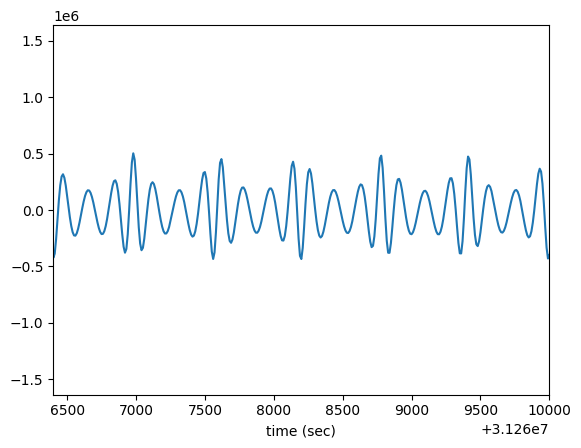

In [3]:
t_grid=cupy.float32(fiducial_model[0][0].get())
WF_grid=cupy.float32(fiducial_model[0][1].get())
hours = 1
plot_waveform(t_grid, WF_grid, hours)
print('Parameters: ' 'M = ', M0, ' ', 'μ =',  μ0, ' ', 'spin =', spin0, ' ', 'e_LSO =', e_LSO, ' ', 'νLSO =', nu_LSO)

### Start the MCMC run

Important things to be checked before starting the MCMC exploration:

-- Make sure the 'filename' where results will be stored is set up correctly (global_parameters.py).

-- Make sure the vector $p\_init\_MC$ with the initialisation range of the walkers is set up to meaningful values (global_parameters.py).

-- Remember that the default electromagnetic luminosity distance is that of LambdaCDM, and that the parameters defining the orientation of the source are kept fixed in the default example. 


In [24]:
# Execute the MCMC inference 

path = str("/home/saltas/Project_EMRI-MC/GW_code/current_code/EMRI_MC_temp/run_code.py")
!python3 /home/saltas/Project_EMRI-MC/GW_code/current_code/EMRI_MC_temp/run_code.py
#path

previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
previous MCMC data file removed
data saved at: MCMC.txt
starting MCMC run .. 
  1%|▎                                      | 19/2000 [00:45<1:19:59,  2.42s/it]^C
emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likeliho

### Plot the MCMC results

This plots the MCMC results (corner plot, histograms, etc.).

-- Make sure the 'filename' with the results to be loaded is set up correctly.

-- Make sure the burnout option ('burn') is chosen appropriately.


In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import emcee

# Read the txt file ("filename") created above to produce the plots. 
# Filename is defined above and saved in local folder. Its data are produced during the MCMC run.

burn = 500
reader = emcee.backends.HDFBackend(filename, read_only=True)
samples = reader.get_chain(flat=True, discard=burn)

dsb = np.array([samples[:,0],samples[:,1],samples[:,2],samples[:,3]])
df = pd.DataFrame(dsb.T,columns = [r'$M$', r'$\mu$',  r'$\frac{S}{M^2}$',  r'$\Xi$'])

plt.figure()
#with plt.style.context({'axes.labelsize':20}):
g = sns.PairGrid(df, diag_sharey=True,corner=True)
g.map_lower(sns.scatterplot, alpha=1, edgecolor='none', s = 0.09, color = 'tomato')
g.map_diag(sns.histplot,  element="step", color = 'blanchedalmond')
plt.savefig('/home/oliveri/corner_plot.png', format='png')

In [ ]:
from IPython.display import display, Math

labels = parameter_names
for i in range(len(labels)):
    mcmc = np.percentile(samples[:, i], [50, 80, 90])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.7f}_{{-{1:.7f}}}^{{+{2:.7f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))